# Modeling

In [ ]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import pickle
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading data

In [ ]:
# loading data
data=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/data.p","rb"))
print("Number of rows in data:",len(data))

Number of rows in data: 1636184


In [ ]:
data=pickle.load(open("/content/drive/MyDrive/data.p","rb"))

## Splitting Data into Train and Test sets



In [ ]:
X_train=data[data['date_block_num']<34].drop('item_cnt_month', axis=1)
y_train=data[data['date_block_num']<34]['item_cnt_month']
X_test=data[data['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data[data['date_block_num']==34]['item_cnt_month']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1421984, 44) (1421984,)
(214200, 44) (214200,)


**Performance Metric**

In [ ]:
def root_mean_squared_error(y,y_pred):
  return round(np.sqrt(mean_squared_error(y,y_pred)),5)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression().fit(X_train,y_train)

y_trainpred=reg.predict(X_train).clip(0,20)
y_testpred=reg.predict(X_test).clip(0,20)

In [ ]:
result_lr= pd.DataFrame()
result_lr['ID']=range(0,214200)
result_lr['item_cnt_month']=y_testpred

result_lr.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_lr.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.18)

train_rmse:  0.90843
test_rmse:  1.18


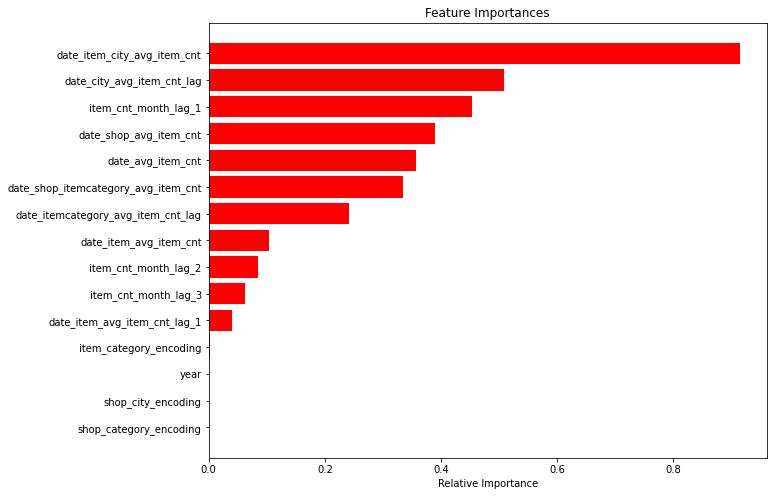

In [ ]:
features = X_train.columns
importances =reg.coef_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
X_train=data[(data['date_block_num']>21)&(data['date_block_num']<34)].drop('item_cnt_month', axis=1)
y_train=data[(data['date_block_num']>21)&(data['date_block_num']<34)]['item_cnt_month']
X_test=data[data['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data[data['date_block_num']==34]['item_cnt_month']

In [ ]:
reg=LinearRegression().fit(X_train,y_train)

y_trainpred=reg.predict(X_train).clip(0,20)
y_testpred=reg.predict(X_test).clip(0,20)

In [ ]:
result_lr= pd.DataFrame()
result_lr['ID']=range(0,214200)
result_lr['item_cnt_month']=y_testpred

result_lr.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_lr1.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.18)

train_rmse:  0.88623
test_rmse:  1.18


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_trainpred=dt.predict(X_train).clip(0,20)
y_testpred=dt.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))

train_rmse:  0.0


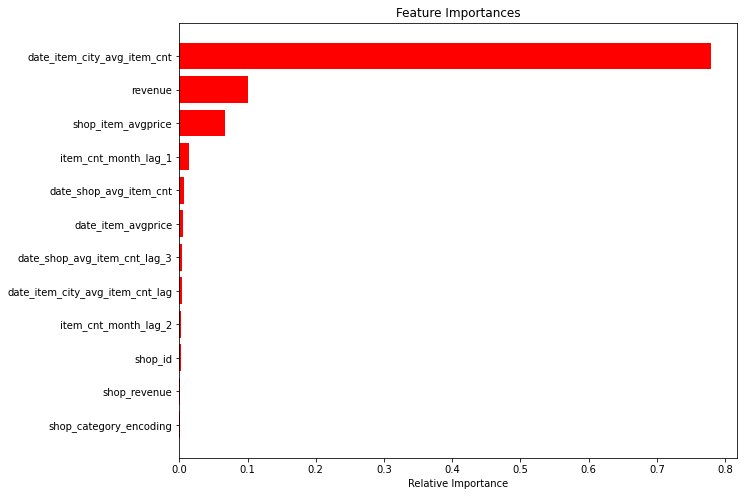

In [ ]:
features = X_train.columns
importances =dt.feature_importances_
indices = (np.argsort(importances))[-12:]
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
data_=data[['date_block_num','item_cnt_month','shop_id','item_cnt_month_lag_2','date_item_city_avg_item_cnt_lag','date_shop_avg_item_cnt_lag_3','date_item_avgprice',
 'date_shop_avg_item_cnt','item_cnt_month_lag_1','shop_item_avgprice','revenue','date_item_city_avg_item_cnt']]

**Hyper Parameter Tuning**

In [ ]:
max_depth=[5,10,15,20,25]
cv_rmse_array=[]
for i in tqdm(max_depth):
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train_,y_train_)
    y_cvpred=dt.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

100%|██████████| 5/5 [19:41<00:00, 236.39s/it]


rmse for max_depth =  5 is 0.952295
rmse for max_depth =  10 is 0.5562426666666666
rmse for max_depth =  15 is 0.34509500000000004
rmse for max_depth =  20 is 0.3239416666666666
rmse for max_depth =  25 is 0.3247946666666666


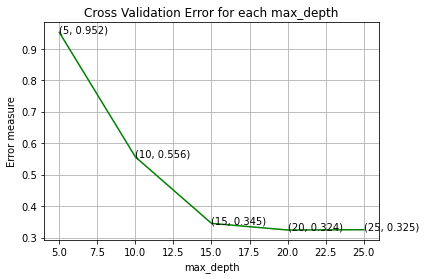

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for max_depth = ',max_depth[i],'is',cv_rmse_array[i])

best_max_depth= np.argmin(cv_rmse_array)

fig, ax = plt.subplots()
ax.plot(max_depth, cv_rmse_array,c='g')
for i, txt in enumerate(np.round(cv_rmse_array,5)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_rmse_array[i]))
plt.grid()
plt.title("Cross Validation Error for each max_depth")
plt.xlabel("max_depth")
plt.ylabel("Error measure")
plt.show()

In [ ]:
min_samples_split=[3,5,7,10,15]
cv_rmse_array=[]
for i in tqdm(min_samples_split):
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    dt=DecisionTreeRegressor(max_depth=max_depth[best_max_depth],min_samples_split=i)
    dt.fit(X_train_,y_train_)
    y_cvpred=dt.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

100%|██████████| 5/5 [25:01<00:00, 300.25s/it]


rmse for min_samples_split=  3 is 0.3194483333333333
rmse for min_samples_split=  5 is 0.3198213333333333
rmse for min_samples_split=  7 is 0.3160823333333333
rmse for min_samples_split=  10 is 0.3149809999999999
rmse for min_samples_split=  15 is 0.31880500000000006


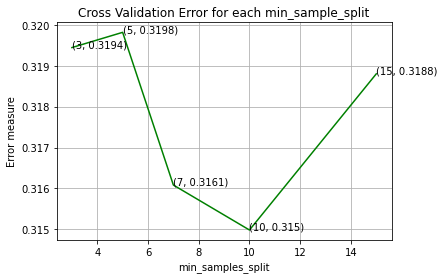

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for min_samples_split= ',min_samples_split[i],'is',cv_rmse_array[i])

best_min_samples_split= np.argmin(cv_rmse_array)

fig, ax = plt.subplots()
ax.plot(min_samples_split, cv_rmse_array,c='g')
for i, txt in enumerate(np.round(cv_rmse_array,5)):
    ax.annotate((min_samples_split[i],np.round(txt,4)), (min_samples_split[i],cv_rmse_array[i]))
plt.grid()
plt.title("Cross Validation Error for each min_sample_split")
plt.xlabel("min_samples_split")
plt.ylabel("Error measure")
plt.show()

In [ ]:
X_train_=data_[data_['date_block_num']<34].drop('item_cnt_month',axis=1)
y_train_=data_[data_['date_block_num']<34]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
dt_model=DecisionTreeRegressor(max_depth=max_depth[best_max_depth],min_samples_split=min_samples_split[best_min_samples_split])
dt_model.fit(X_train_,y_train_)

y_trainpred=dt_model.predict(X_train_).clip(0,20)
y_testpred=dt_model.predict(X_test).clip(0,20)

In [ ]:
result_dt= pd.DataFrame()
result_dt['ID']=range(0,214200)
result_dt['item_cnt_month']=y_testpred

result_dt.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_dt1.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.3837)

train_rmse:  0.10857
test_rmse:  1.3837


**using last 12 months data**

In [ ]:
X_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)].drop('item_cnt_month',axis=1)
y_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
dt_model=DecisionTreeRegressor(max_depth=max_depth[best_max_depth],min_samples_split=min_samples_split[best_min_samples_split])
dt_model.fit(X_train_,y_train_)

y_trainpred=dt_model.predict(X_train_).clip(0,20)
y_testpred=dt_model.predict(X_test).clip(0,20)

In [ ]:
result_dt= pd.DataFrame()
result_dt['ID']=range(0,214200)
result_dt['item_cnt_month']=y_testpred

result_dt.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_dt2.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train_,y_trainpred))
print("test_rmse: ",1.36788)

train_rmse:  0.1561
test_rmse:  1.36788


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

y_trainpred=rfr.predict(X_train).clip(0,20)
y_testpred=rfr.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))

train_rmse:  0.07241


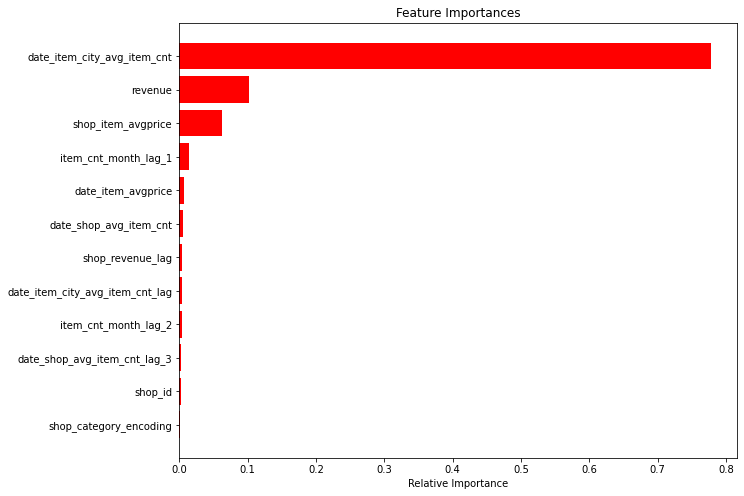

In [ ]:
features = X_train.columns
importances =rfr.feature_importances_
indices = (np.argsort(importances))[-12:]
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
data_=data[['date_block_num','item_cnt_month','shop_id','date_shop_avg_item_cnt_lag_3','item_cnt_month_lag_2','date_item_city_avg_item_cnt_lag',
           'shop_revenue_lag','date_shop_avg_item_cnt','date_item_avgprice','item_cnt_month_lag_1','shop_item_avgprice','revenue','date_item_city_avg_item_cnt']]

**Hyper Parameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_depth=[5,10,15,20,25,30]
cv_rmse_array=[]
for i in max_depth:
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    rfr=RandomForestRegressor(max_depth=i,n_jobs=-1)
    rfr.fit(X_train_,y_train_)
    y_cvpred=rfr.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

rmse for max_depth =  5 is 0.8874376666666667
rmse for max_depth =  10 is 0.43472733333333335
rmse for max_depth =  15 is 0.22985666666666668
rmse for max_depth =  20 is 0.21269800000000003
rmse for max_depth =  25 is 0.2109583333333333
rmse for max_depth =  30 is 0.21137166666666665


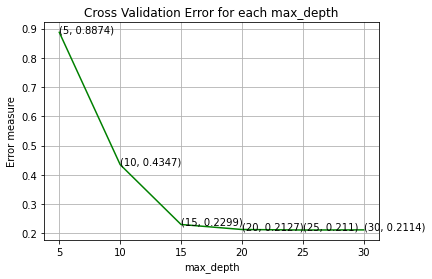

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for max_depth = ',max_depth[i],'is',cv_rmse_array[i])

best_max_depth= np.argmin(cv_rmse_array)

fig, ax = plt.subplots()
ax.plot(max_depth, cv_rmse_array,c='g')
for i, txt in enumerate(np.round(cv_rmse_array,5)):
    ax.annotate((max_depth[i],np.round(txt,4)), (max_depth[i],cv_rmse_array[i]))
plt.grid()
plt.title("Cross Validation Error for each max_depth")
plt.xlabel("max_depth")
plt.ylabel("Error measure")
plt.show()

In [ ]:
estimators=[10,50,100]
cv_rmse_array=[]
for i in tqdm(estimators):
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    rfr=RandomForestRegressor(max_depth=25,n_estimators=i,n_jobs=-1)
    rfr.fit(X_train_,y_train_)
    y_cvpred=rfr.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for n_estimators = ',estimators[i],'is',cv_rmse_array[i])

rmse for n_estimators =  10 is 0.23225800000000002
rmse for n_estimators =  50 is 0.21503099999999994
rmse for n_estimators =  100 is 0.21152833333333335


In [ ]:
X_train_=data_[data_['date_block_num']<34].drop('item_cnt_month',axis=1)
y_train_=data_[data_['date_block_num']<34]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
rfr=RandomForestRegressor(max_depth=25,n_estimators=500,n_jobs=-1)
rfr.fit(X_train_,y_train_)

y_trainpred=rfr.predict(X_train_).clip(0,20)
y_testpred=rfr.predict(X_test).clip(0,20)

In [ ]:
result_rf= pd.DataFrame()
result_rf['ID']=range(0,214200)
result_rf['item_cnt_month']=y_testpred

result_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_rf.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.388)

train_rmse:  0.06223
test_rmse:  1.388


**Using 12 months data**

In [ ]:
X_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)].drop('item_cnt_month',axis=1)
y_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
rfr=RandomForestRegressor(max_depth=25,n_estimators=500,n_jobs=-1)
rfr.fit(X_train_,y_train_)

y_trainpred=rfr.predict(X_train_).clip(0,20)
y_testpred=rfr.predict(X_test).clip(0,20)

In [ ]:
result_rf= pd.DataFrame()
result_rf['ID']=range(0,214200)
result_rf['item_cnt_month']=y_testpred

result_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_rf1.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train_,y_trainpred))
print("test_rmse: ",1.375)

train_rmse:  0.07959
test_rmse:  1.375


## XGBoost Regressor

In [ ]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBRegressor

import xgboost as xgb

xgb_model= xgb.XGBRegressor(objective ='reg:squarederror')
xgb_model.fit(X_train,y_train)

y_trainpred=xgb_model.predict(X_train).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))

train_rmse:  0.52633


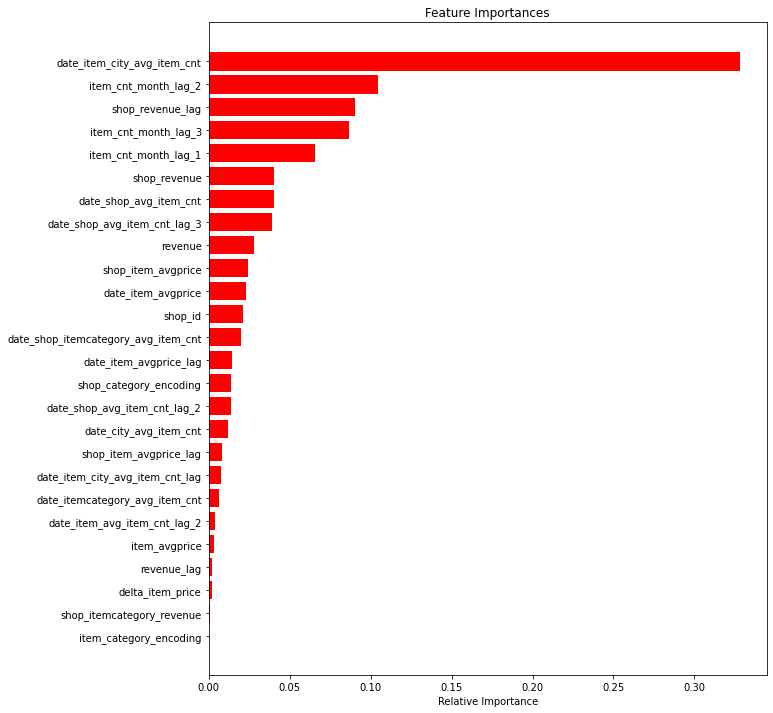

In [ ]:
features = X_train.columns
importances =xgb_model.feature_importances_
indices = (np.argsort(importances))[-26:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
data_=data[['date_block_num','item_cnt_month','shop_itemcategory_revenue','delta_item_price','revenue_lag','item_avgprice','date_item_avg_item_cnt_lag_2',
            'date_itemcategory_avg_item_cnt','date_item_city_avg_item_cnt_lag','shop_item_avgprice_lag','date_city_avg_item_cnt','date_shop_avg_item_cnt_lag_2',
            'shop_category_encoding','date_item_avgprice_lag','date_shop_itemcategory_avg_item_cnt','shop_id','date_item_avgprice','shop_item_avgprice','revenue',
            'date_shop_avg_item_cnt_lag_3','date_shop_avg_item_cnt','shop_revenue','item_cnt_month_lag_1','item_cnt_month_lag_3','shop_revenue_lag','item_cnt_month_lag_2',
            'date_item_city_avg_item_cnt']]

**Hyper Parameter Tuning**

In [ ]:
import xgboost as xgb

In [ ]:
max_depth=[5,6,7,8,9,10,11]
cv_rmse_array=[]
for i in tqdm(max_depth):
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    xgb_model= xgb.XGBRegressor(max_depth=i,objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
    xgb_model.fit(X_train_,y_train_)
    y_cvpred=xgb_model.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

100%|██████████| 7/7 [12:31<00:00, 107.41s/it]


rmse for max_depth =  5 is 0.2943306666666667
rmse for max_depth =  6 is 0.24100133333333332
rmse for max_depth =  7 is 0.21234633333333336
rmse for max_depth =  8 is 0.19909500000000005
rmse for max_depth =  9 is 0.1968136666666667
rmse for max_depth =  10 is 0.19951933333333335
rmse for max_depth =  11 is 0.2066133333333333


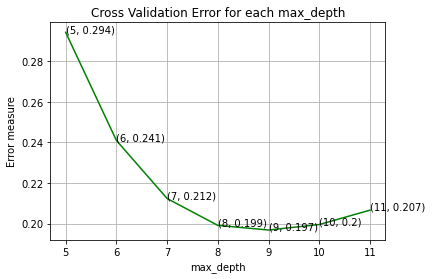

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for max_depth = ',max_depth[i],'is',cv_rmse_array[i])

best_max_depth= np.argmin(cv_rmse_array)

fig, ax = plt.subplots()
ax.plot(max_depth, cv_rmse_array,c='g')
for i, txt in enumerate(np.round(cv_rmse_array,5)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_rmse_array[i]))
plt.grid()
plt.title("Cross Validation Error for each max_depth")
plt.xlabel("max_depth")
plt.ylabel("Error measure")
plt.show()

In [ ]:
estimators=[100,300,500,1000,2000]
cv_rmse_array=[]
for i in tqdm(estimators):
  cv_scores=[]
  for k in range(4,34):
    X_train_=data_[data_['date_block_num']<k].drop('item_cnt_month',axis=1)
    y_train_=data_[data_['date_block_num']<k]['item_cnt_month']
    X_cv=data_[data_['date_block_num']==k].drop('item_cnt_month', axis=1)
    y_cv=data_[data_['date_block_num']==k]['item_cnt_month']

    xgb_model= xgb.XGBRegressor(max_depth=9,n_estimators=i,objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
    xgb_model.fit(X_train_,y_train_)
    y_cvpred=xgb_model.predict(X_cv).clip(0,20)
    cv_scores.append(root_mean_squared_error(y_cv,y_cvpred))
  cv_rmse_array.append(np.mean(cv_scores))

100%|██████████| 5/5 [54:15<00:00, 651.01s/it]


rmse for n_estimators =  100 is 0.196898
rmse for n_estimators =  300 is 0.19086633333333328
rmse for n_estimators =  500 is 0.18929733333333337
rmse for n_estimators =  1000 is 0.1883536666666666
rmse for n_estimators =  2000 is 0.18788866666666668


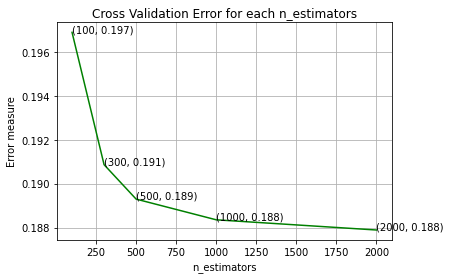

In [ ]:
for i in range(len(cv_rmse_array)):
    print ('rmse for n_estimators = ',estimators[i],'is',cv_rmse_array[i])

best_n_estimators= np.argmin(cv_rmse_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_rmse_array,c='g')
for i, txt in enumerate(np.round(cv_rmse_array,5)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_rmse_array[i]))
plt.grid()
plt.title("Cross Validation Error for each n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Error measure")
plt.show()

In [ ]:
xgb_model= xgb.XGBRegressor(max_depth=9,n_estimators=2000,objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
xgb_model.fit(X_train,y_train)

y_trainpred=xgb_model.predict(X_train).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
result_xgb= pd.DataFrame()
result_xgb['ID']=range(0,214200)
result_xgb['item_cnt_month']=y_testpred

result_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_xgb.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.44)

train_rmse:  0.01251
test_rmse:  1.44


**Using last 12 months data**

In [ ]:
X_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)].drop('item_cnt_month',axis=1)
y_train_=data_[(data_['date_block_num']>21)&(data_['date_block_num']<34)]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
xgb_model= xgb.XGBRegressor(max_depth=9,n_estimators=2000,objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
xgb_model.fit(X_train_,y_train_)

y_trainpred=xgb_model.predict(X_train_).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
result_xgb= pd.DataFrame()
result_xgb['ID']=range(0,214200)
result_xgb['item_cnt_month']=y_testpred

result_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_xgb2.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train_,y_trainpred))
print("test_rmse: ",1.436)

train_rmse:  0.00576
test_rmse:  1.436


**using last 24 months data**

In [ ]:
X_train_=data_[(data_['date_block_num']>9)&(data_['date_block_num']<34)].drop('item_cnt_month',axis=1)
y_train_=data_[(data_['date_block_num']>9)&(data_['date_block_num']<34)]['item_cnt_month']
X_test=data_[data_['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data_[data_['date_block_num']==34]['item_cnt_month']

In [ ]:
xgb_model= xgb.XGBRegressor(max_depth=9,n_estimators=2000,objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
xgb_model.fit(X_train_,y_train_)

y_trainpred=xgb_model.predict(X_train_).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
result_xgb= pd.DataFrame()
result_xgb['ID']=range(0,214200)
result_xgb['item_cnt_month']=y_testpred

result_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_xgb3.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train_,y_trainpred))
print("test_rmse: ",1.422)

train_rmse:  0.01047
test_rmse:  1.422


In [ ]:
xgb_model= xgb.XGBRegressor(max_depth=9,n_estimators=2000,learning_rate=0.148,min_child_weight=26,reg_lambda=0.171,reg_alpha=0.170,
                            objective ='reg:squarederror',n_jobs=-1,tree_method='gpu_hist',gpu_id=0)
xgb_model.fit(X_train,y_train)

y_trainpred=xgb_model.predict(X_train).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
result_xgb= pd.DataFrame()
result_xgb['ID']=range(0,214200)
result_xgb['item_cnt_month']=y_testpred

result_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/result_xgb4.csv",index=False)

In [ ]:
print("train_rmse: ",root_mean_squared_error(y_train,y_trainpred))
print("test_rmse: ",1.442)

train_rmse:  0.0226
test_rmse:  1.442
